# Project: Investigating Global Indicators

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I'm going to use global indicators from GapMinder to explore trends in North American economies. In particular I will investigate how employment rate, trade balances and Gross formation Capital(GFC) effect the GDP's of Canada, the United States and Mexico.


Loaded necessary libraries

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Loaded necessary files. 

In [364]:
df_gdp= pd.read_excel('GDPpercapita.xlsx', sheet_name='Data')
df_employ1= pd.read_excel('15 employ.xlsx', sheet_name='Data')
df_employ2= pd.read_excel('15-24 employ.xlsx', sheet_name='Data')
df_trade= pd.read_excel('Trade balance.xlsx', sheet_name='Data')
df_invest= pd.read_excel('Investment.xlsx', sheet_name='Data')


<a id='wrangling'></a>
## Data Wrangling

### Does the employment rate affect GDP?

Cleaning the file "GDPpercapita.xlsx": Renamed the column, searched for data I want to use and will interchange the axes so plotting will be easier

This file is for the income per person (fixed 2000 US$)

In [365]:
df_gdp.head()

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


In [366]:
df_gdp.rename(columns={'Income per person (fixed 2000 US$)':'Year'}, inplace=True)

In [367]:
df_gdp.set_index("Year", inplace=True)

In [368]:
df_gdp= df_gdp.loc[['Canada', 'United States', 'Mexico']]

In [369]:
df_gdp= df_gdp.T

In [370]:
df_gdp.head()

Year,Canada,United States,Mexico
1960,9374.882816,13723.237781,2455.952465
1961,9479.824032,13808.064022,2496.598061
1962,9967.365638,14426.757715,2531.238029
1963,10290.362000,14846.327063,2652.438985
1964,10774.653308,15490.739158,2878.955496


Cleaning the file "15 employ.xlsx": Renamed the column, searched for data I want to use and will interchange the axes so plotting will be easier

In [ ]:
Income per person (fixed 2000 US$)

In [371]:
df_employ1.head()

,Total above 15 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,56.700001,56.500000,56.599998,56.200001,56.200001,56.099998,56.200001,56.200001,56.099998,56.099998,56.500000,56.400002,54.400002,56.000000,54.000000,56.000000,55.700001
1,Albania,52.700001,52.299999,52.400002,52.700001,52.799999,52.599998,52.400002,52.099998,52.099998,51.900002,51.799999,51.799999,51.799999,51.700001,51.500000,51.400002,51.400002
2,Algeria,39.400002,38.900002,39.400002,39.400002,38.099998,38.900002,39.700001,39.500000,39.400002,38.599998,40.400002,41.500000,42.799999,46.400002,48.000000,50.000000,50.500000
3,Angola,75.800003,75.800003,75.500000,75.900002,75.800003,75.900002,75.699997,75.599998,75.599998,75.500000,75.500000,75.599998,75.500000,75.500000,75.599998,75.500000,75.699997
4,Argentina,53.599998,53.799999,53.700001,53.799999,53.500000,54.400002,54.900002,55.000000,54.900002,55.500000,55.599998,55.400002,57.299999,57.700001,58.099998,58.400002,58.400002


In [372]:
df_employ1.rename(columns={'Total above 15 employment to population (%)': 'Year'}, inplace=True)

In [373]:
df_employ1.set_index("Year", inplace=True)

In [374]:
df_employ1= df_employ1.loc[['Canada', 'United States', 'Mexico']]

In [375]:
df_employ1= df_employ1.T

Cleaning the file "15-24 employ.xlsx": Renamed the column, searched for data I want to use and will interchange the axes so plotting will be easier

In [376]:
df_employ1.head()

Year,Canada,United States,Mexico
1991,59.400002,61.299999,56.900002
1992,58.000000,61.099998,57.500000
1993,57.599998,61.400002,58.099998
1994,58.000000,62.200001,57.299999
1995,58.299999,62.599998,55.700001


In [377]:
df_employ2.head()

,Total 15-24 employment to population (%),1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,50.400002,50.200001,50.400002,50.000000,50.000000,50.000000,50.099998,50.099998,50.099998,50.200001,50.799999,50.599998,47.799999,50.000000,45.900002,48.799999,48.000000
1,Albania,38.900002,38.500000,38.599998,38.799999,38.799999,38.200001,38.400002,38.099998,37.700001,37.400002,37.000000,36.799999,36.400002,35.900002,35.500000,35.200001,35.599998
2,Algeria,25.400000,24.700001,25.200001,25.100000,23.700001,24.600000,25.299999,24.799999,24.299999,23.200001,24.900000,25.700001,26.900000,31.000000,32.500000,34.799999,34.000000
3,Angola,69.099998,68.500000,69.000000,68.900002,69.900002,69.900002,69.500000,69.099998,68.900002,68.900002,68.800003,68.699997,68.400002,68.300003,68.099998,67.500000,67.699997
4,Argentina,42.900002,43.299999,43.299999,43.799999,43.500000,44.000000,44.000000,43.299999,42.299999,42.200001,41.299999,40.000000,41.299999,40.700001,40.000000,39.400002,39.000000


In [378]:
df_employ2.rename(columns={'Total 15-24 employment to population (%)': 'Year'}, inplace=True)

In [379]:
df_employ2.set_index("Year", inplace=True)

In [380]:
df_employ2=df_employ2.loc[['Canada', 'United States', 'Mexico']]

In [381]:
df_employ2= df_employ2.T

In [382]:
df_employ2.head()

Year,Canada,United States,Mexico
1991,57.299999,56.099998,50.200001
1992,54.700001,55.500000,51.000000
1993,53.299999,56.099998,52.000000
1994,53.700001,57.099998,50.599998
1995,53.799999,57.500000,48.500000


Cleaning data so all columns are consitent between data frames

In [383]:
df_gdp= df_gdp.loc['1991':'2007']

### Does the trade balance affect GDP?

Cleaning the file "Trade balance.xlsx": Renamed the column, searched for data I want to use and will interchange the axes so plotting will be easier

In [384]:
df_trade.head()

,Trade balance (% of GDP),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-2.89256,-3.643723,-4.471542,-7.692309,-9.166663,-10.154525,-10.000000,-7.436919,-6.31068,...,-31.042518,-48.900998,-47.305050,-46.062876,-43.515022,-40.977846,-32.085333,-42.888784,-38.075086,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-26.297294,-25.254841,-21.764383,-24.053052,-24.060613,-26.187554,-26.607959,-25.644483,-21.980424,NaN
2,Algeria,-28.10046,-21.259214,-1.024774,-12.140833,-4.355704,-3.229135,1.332626,1.802647,-1.05162,...,9.676179,14.392191,14.419762,23.376450,27.091165,23.316437,23.365028,4.468553,9.333726,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
df_trade.rename(columns={'Trade balance (% of GDP)': 'Year'}, inplace=True)

In [386]:
df_trade.set_index("Year", inplace=True)

In [387]:
df_trade=df_trade.loc[['Canada', 'United States', 'Mexico']]

In [388]:
df_trade=df_trade.T

In [389]:
df_trade= df_trade.loc['1991':'2007']

In [390]:
df_trade.head()

Year,Canada,United States,Mexico
1991,-0.573707,-0.453572,-2.907581
1992,-0.372459,-0.523811,-5.033747
1993,-0.001238,-0.978292,-3.926071
1994,1.182166,-1.325554,-4.814641
1995,3.191161,-1.235964,2.658942


### Does Gross Capital Formation affect GDP?

Cleaning the file "Investment.xlsx": Renamed the column, searched for data I want to use and will interchange the axes so plotting will be easier

In [391]:
df_invest.head()

,Gross capital formation (% of GDP),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,16.115710,16.599198,19.105702,14.201190,13.888894,11.258279,8.412698,5.179283,6.472492,...,11.636239,16.219772,17.406618,31.269243,34.714020,31.883340,16.328167,15.413445,16.282647,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.487029,23.435684,23.839373,23.596435,25.046448,29.757136,32.125213,28.969198,25.928113,NaN
2,Algeria,42.184577,47.189529,35.420613,28.940662,21.846608,22.603944,17.324132,23.434417,27.867922,...,31.187416,30.472276,33.268226,31.510868,29.501880,34.222803,33.368650,46.700000,41.400000,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [392]:
df_invest.rename(columns={'Gross capital formation (% of GDP)': 'Year'}, inplace=True)

In [393]:
df_invest.set_index("Year", inplace=True)

In [394]:
df_invest=df_invest.loc[['Canada', 'United States', 'Mexico']]

In [395]:
df_invest= df_invest.T

In [396]:
df_invest=df_invest.loc['1991':'2007']

In [397]:
df_invest.head()

Year,Canada,United States,Mexico
1991,18.783951,16.289814,23.328600
1992,17.797653,16.487272,23.291631
1993,17.846377,17.060870,20.998064
1994,18.872369,18.177398,21.892059
1995,18.758900,18.153821,19.968743


Combined all databases into one large database in case I need to share information

In [398]:
GDP= np.repeat('GDP', df_gdp.shape[0])
df_gdp['Indicator']= GDP
EMPLOY1= np.repeat('Emploment Rate 15+', df_employ1.shape[0])
df_employ1['Indicator']= EMPLOY1
EMPLOY2= np.repeat('Employment Rate 15-24', df_employ2.shape[0])
df_employ2['Indicator']= EMPLOY2
TRADE= np.repeat('Trade Balance', df_trade.shape[0])
df_trade['Indicator']= TRADE
INVEST= np.repeat('Gross Capital Formation', df_invest.shape[0])
df_invest['Indicator']= INVEST

In [399]:
df= pd.concat([df_gdp, df_employ1, df_employ2, df_trade, df_invest])

<a id='eda'></a>
## Exploratory Data Analysis

Checking trends in the data: 

Had to make the index an integer to plot the x-axis on the following plots

In [406]:
df_gdp.index = df_gdp.index.map(int)
df_employ1.index = df_employ1.index.map(int)
df_employ2.index = df_employ2.index.map(int)
df_trade.index = df_trade.index.map(int)
df_invest.index = df_invest.index.map(int)

General overview of data so I could decide what to explore:

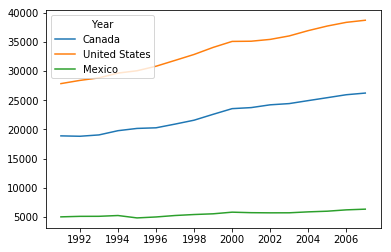

In [407]:
df_gdp.plot.line();

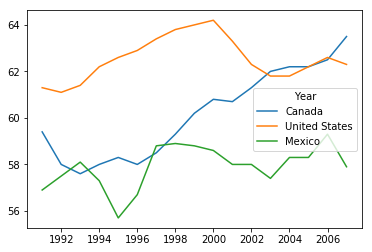

In [408]:
df_employ1.plot.line();

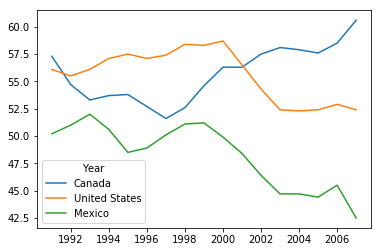

In [409]:
df_employ2.plot.line();

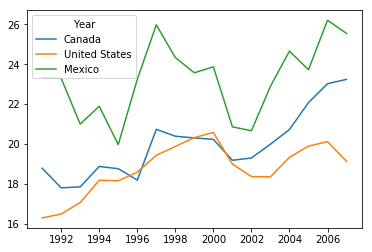

In [410]:
df_invest.plot.line();

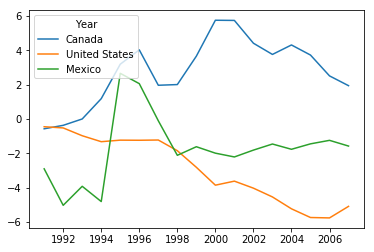

In [411]:
df_trade.plot.line();

It seems the strongest indicator of GDP is the employment rate of ages 15+ and the mean values also share this reasoning.

In [412]:
df_gdp['Canada'].mean()

22386.495678018768

In [426]:
df_gdp['United States'].mean()

33394.656724102992

In [427]:
df_gdp['Mexico'].mean()

5519.8714506915985

In [413]:
df_employ1['Canada'].mean()

60.147058823529413

In [429]:
df_employ1['United States'].mean()

62.541176066679128

In [428]:
df_employ1['Mexico'].mean()

57.911764705882369

The investment or GFC seems like a bad indicator of GDP based on the mean values.

In [434]:
df_invest['Canada'].mean()

19.966278193726858

In [435]:
df_invest['United States'].mean()

18.771746864875535

In [436]:
df_invest['Mexico'].mean()

23.23585666996118

For easier comparison for specific countries the following plots were made:

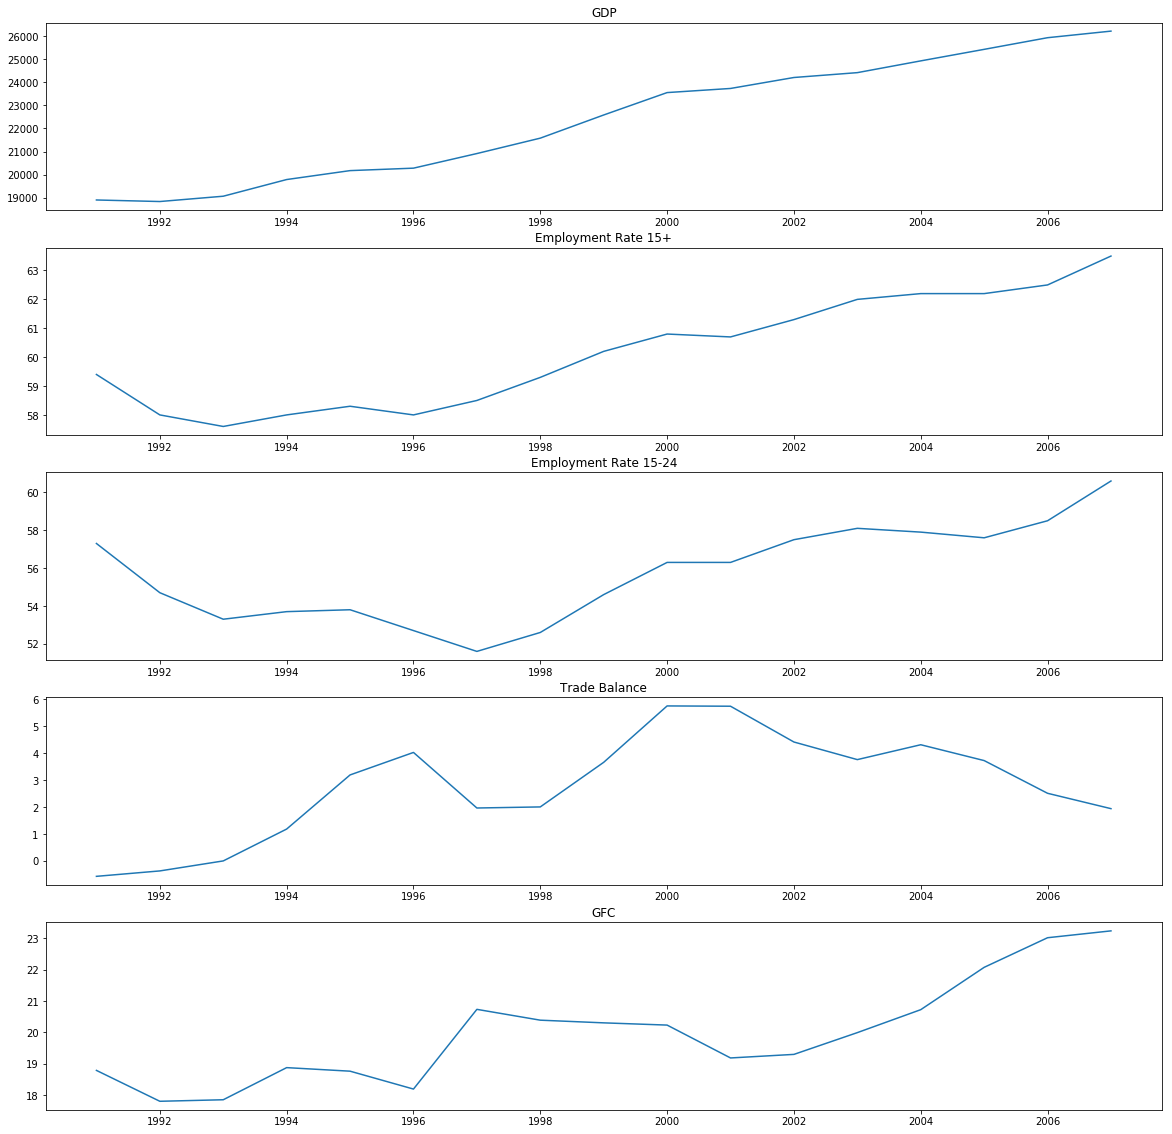

In [424]:
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
df_gdp['Canada'].plot()
plt.title('GDP')

plt.subplot(5,1,2)
df_employ1['Canada'].plot()
plt.title('Employment Rate 15+')

plt.subplot(5,1,3)
df_employ2['Canada'].plot()
plt.title('Employment Rate 15-24')

plt.subplot(5,1,4)
df_trade['Canada'].plot()
plt.title('Trade Balance')

plt.subplot(5,1,5)
df_invest['Canada'].plot()
plt.title('GFC');

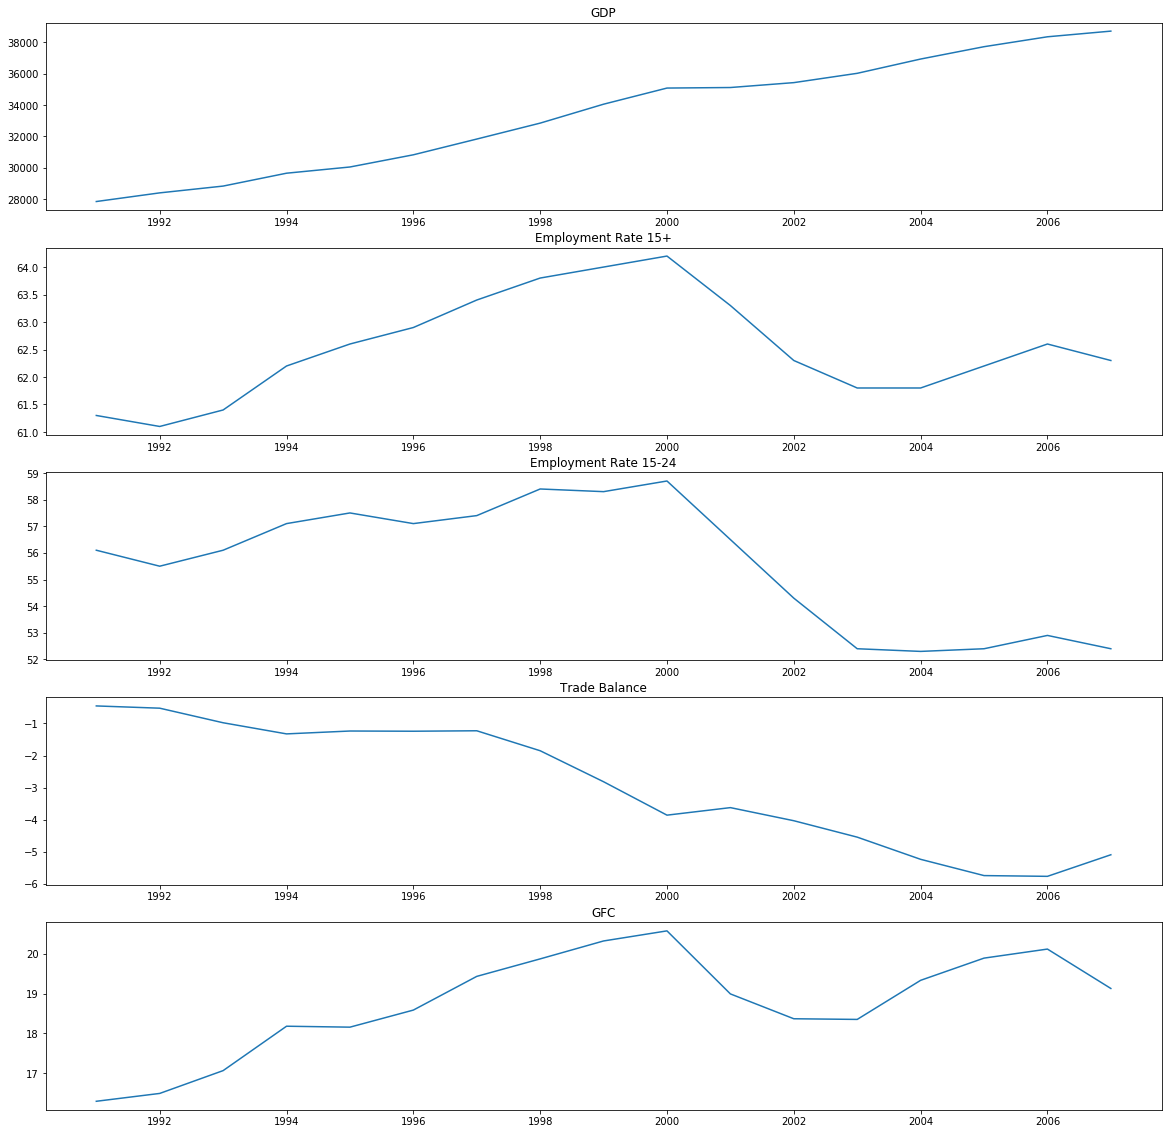

In [425]:
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
df_gdp['United States'].plot()
plt.title('GDP')

plt.subplot(5,1,2)
df_employ1['United States'].plot()
plt.title('Employment Rate 15+')

plt.subplot(5,1,3)
df_employ2['United States'].plot()
plt.title('Employment Rate 15-24')

plt.subplot(5,1,4)
df_trade['United States'].plot()
plt.title('Trade Balance')

plt.subplot(5,1,5)
df_invest['United States'].plot()
plt.title('GFC');

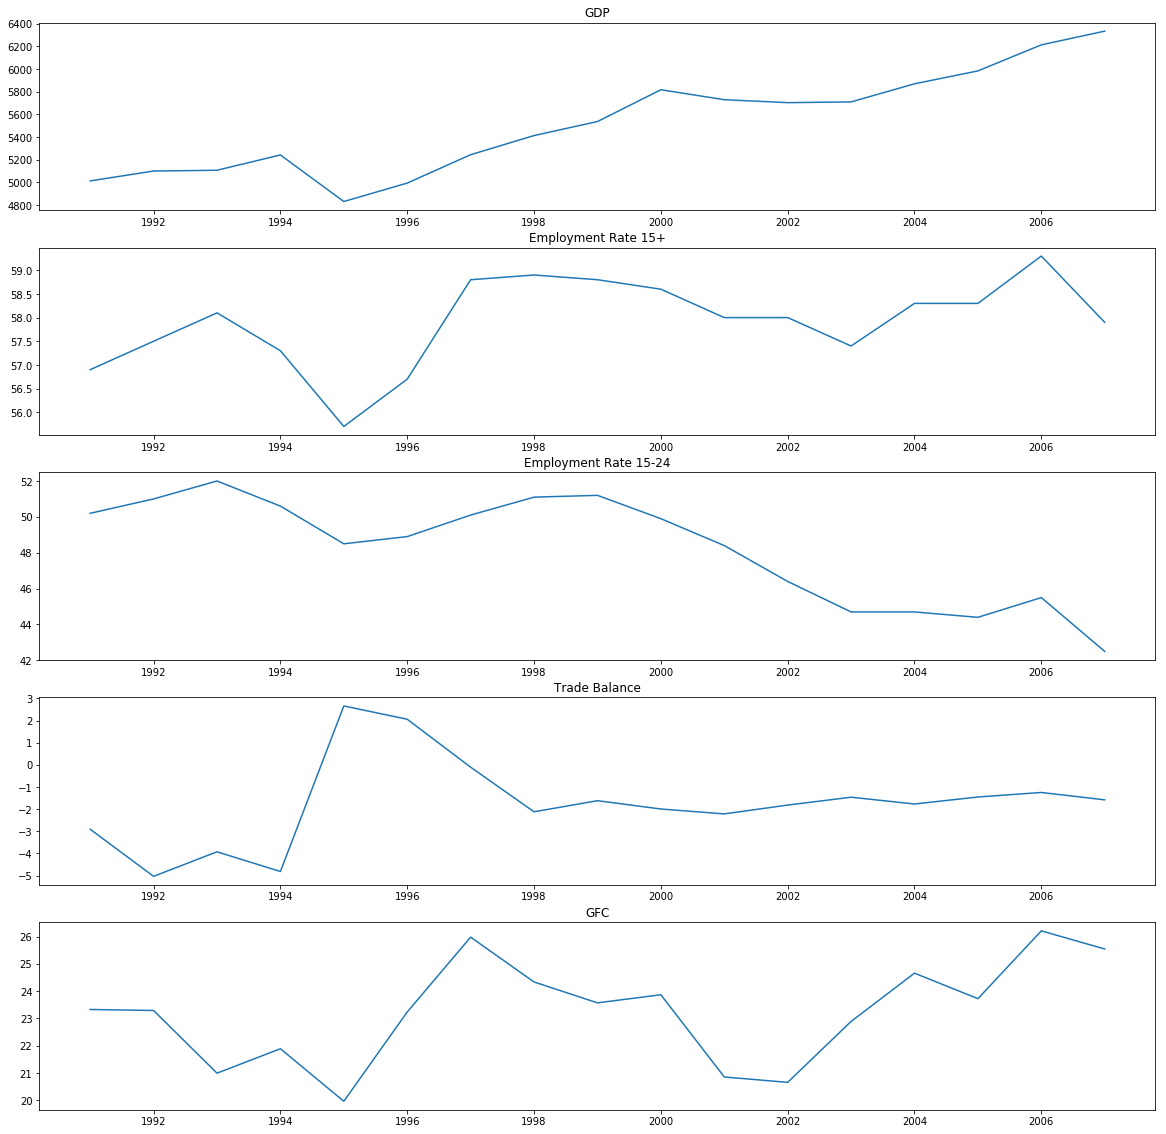

In [433]:
plt.figure(figsize=(20,20))
plt.subplot(5,1,1)
df_gdp['Mexico'].plot()
plt.title('GDP')

plt.subplot(5,1,2)
df_employ1['Mexico'].plot()
plt.title('Employment Rate 15+')

plt.subplot(5,1,3)
df_employ2['Mexico'].plot()
plt.title('Employment Rate 15-24')

plt.subplot(5,1,4)
df_trade['Mexico'].plot()
plt.title('Trade Balance')

plt.subplot(5,1,5)
df_invest['Mexico'].plot()
plt.title('GFC');

<a id='conclusions'></a>
## Conclusions

> The factors that affect GDP are known, however the database did not have all the indicators we needed to verify they were indeed the strongest factors. I chose the factors: employment rate for ages 15+, employment rate for ages 15-24, trade balance between imports and exports, and the investment by the respective country (Gross Capital Formation or GFC). All these indicators were chosen from GapMinder because they were calculated proportionally with respect to population or GDP to make analyzing the data more reliable in comparisons. 

>I used employment rate because consumer expenditure is a source of income for the country and I wanted to see if the employment rate affected GDP and therefore consumer expenditure. By checking the mean employment rate for ages 15+ we can see the strongest average also has the strongest GDP, which is the United States. However, this does not conclude that they are correlated.

>The employment rate between ages 15-24 would have negligible impact on the GDP and we could see that from the plots that they roughly follow the same trend as the employment rate for ages 15+. We can conclude that this is not a strong indicator of GDP.

>Finally, the GFC was not a good indicator of GDP because Mexico had the highest mean GFC and the lowest GDP. It is not wrong to say that GFC affects GDP but it is not a strong indicator in the sense that you could make predictions based on its trend.

>The trade balance shows how the country is importing or exporting but not how it is profiting. From my analysis there is no correlation between GDP and trade balance. I can tell this by the mean values for this indicator and the plots displayed.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])